In [1]:
!pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-02-22 21:35:30--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [      <=>           ]  22.62M  18.9MB/s    in 1.2s    

2025-02-22 21:35:32 (18.9 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
!unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
import time
stime = time.time()

In [6]:
df1 = pd.read_excel("Online Retail.xlsx", dtype = {"InvoiceNo" : "string", "StockCode" : "string", "Description" : "string", "Country" : "string"})
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
df1.shape

(541909, 8)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


Here I have download the file in my local computer.

In [9]:
# df1.to_excel("Online Retail.xlsx", index=False)

In [10]:
# from google.colab import files
# files.download("Online Retail.xlsx")

#### Data Cleaning and Handling Missing Values Process began

In [11]:
df1.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [12]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [13]:
df1[df1.StockCode == "22139"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


This is the most frequent Description of "22139" StockCode.
We will use this Description to replace all the null/inaccurate values of this StockCode.

In [14]:
df1[df1.StockCode == "22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [15]:
df1[["StockCode", "Description"]].value_counts()

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2302
22423      REGENCY CAKESTAND 3 TIER              2200
85099B     JUMBO BAG RED RETROSPOT               2159
47566      PARTY BUNTING                         1727
20725      LUNCH BAG RED RETROSPOT               1638
                                                 ... 
35954      counted                                  1
           check                                    1
35923      check                                    1
35915C     damaged                                  1
m          Manual                                   1
Name: count, Length: 4792, dtype: int64

In [16]:
most_freq = df1[["StockCode", "Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35954,counted,1
4788,35954,check,1
4789,35923,check,1
4790,35915C,damaged,1


In [17]:
most_freq[most_freq.StockCode == '22423']

,StockCode,Description,count
1,22423,REGENCY CAKESTAND 3 TIER,2200
3911,22423,damages,2
4152,22423,faulty,1


In [18]:
most_freq = most_freq.groupby("StockCode").head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4767,35600A,Found by jackie,1
4769,35597B,BLACKCHRISTMAS TREE 30CM,1
4770,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4777,37330,BIG POLKADOT MUG,1


In [19]:
most_freq.columns = ["StockCode", "freq_description", "count"]

df2 = df1.merge(most_freq, on = "StockCode", how = "left")

df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,PACK OF 20 SPACEBOY NAPKINS,148.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,CHILDREN'S APRON DOLLY GIRL,320.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY DOLLY GIRL,307.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,CHILDRENS CUTLERY CIRCUS PARADE,162.0


In [20]:
df2[df2.StockCode == "85123A"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
...,...,...,...,...,...,...,...,...,...,...
539342,581439,85123A,CREAM HANGING HEART T-LIGHT HOLDER,1,2011-12-08 16:30:00,5.79,NaN,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,17675.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 19:55:00,2.95,15796.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
540837,581492,85123A,CREAM HANGING HEART T-LIGHT HOLDER,3,2011-12-09 10:03:00,5.79,NaN,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0


In [21]:
df2.Description = df2.freq_description
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [22]:
df2[df2.StockCode == "85123A"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
...,...,...,...,...,...,...,...,...,...,...
539342,581439,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-12-08 16:30:00,5.79,NaN,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-12-08 18:03:00,2.55,17675.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-12-08 19:55:00,2.95,15796.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
540837,581492,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2011-12-09 10:03:00,5.79,NaN,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0


In [23]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_description,112
count,112


We have replace all the invalid Description with the Frequent Description.
Now i can remove the actual null values from the Dataset.

In [24]:
df2.dropna(subset="Description", inplace = True)

In [25]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
freq_description,0
count,0


We have successfully handle the invalid and the null Description values. We can ignore the CustomerID column because in the Sales Transaction it is not necessary to fix. Now we can drop the extra columns from our dataset.

In [26]:
df2.drop(columns= ["freq_description", "count"], inplace = True)
df2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [27]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


We can see we have some Negative value in the Quantity and the UnitPrice columns.
Quantity and UnitPrice can't be a negative value so we are considering them as an invalid value too.

In [28]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [29]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


We are making another dataset except these invalid values.

In [30]:
df3 = df2[(df2.Quantity>0) & (df2.UnitPrice>0)]
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [31]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In the Quantity Column we can see 75% of values is in 10.00 but the max value is 80995. We have to see whether it is an Outlier of not.

In [32]:
df3['Quantity'].quantile(0.9999)

1439.8763999990188

In [33]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom


We are assuming these values are correct so we are not touching it.

#### **Feature Engineering : Creating New Columns**

In [34]:
df4 = df3.copy()

In [35]:
df4["Total_Sales"] = df4["Quantity"] * df4["UnitPrice"]
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [36]:
df4.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Sales
count,530104.000000,530104,530104.000000,397884.000000,530104.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453,20.121871
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000,3.750000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000,9.900000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000,17.700000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000,168469.600000
std,155.524124,NaN,35.915681,1713.141560,270.356743


In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  string        
 1   StockCode    530104 non-null  string        
 2   Description  530104 non-null  string        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  string        
 8   Total_Sales  530104 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 40.4 MB


In [38]:
df4["Month"] = df4.InvoiceDate.dt.month
# df4["Day"] = df4.InvoiceDate.dt.day
# df4["Hour"] = df4.InvoiceDate.dt.hour
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month
242077,558311,22328,ROUND SNACK BOXES SET OF 4 FRUITS,144,2011-06-28 11:22:00,2.55,14646.0,Netherlands,367.20,6
181609,552493,84946,ANTIQUE SILVER T-LIGHT GLASS,1,2011-05-09 16:21:00,2.46,NaN,United Kingdom,2.46,5
98330,544677,21447,12 IVORY ROSE PEG PLACE SETTINGS,1,2011-02-22 16:13:00,1.25,18196.0,United Kingdom,1.25,2
302625,563439,23168,CLASSIC CAFE SUGAR DISPENSER,2,2011-08-16 13:05:00,3.29,NaN,United Kingdom,6.58,8
91118,544087,22940,FELTCRAFT CHRISTMAS FAIRY,2,2011-02-15 17:02:00,4.25,17530.0,United Kingdom,8.50,2


#### Visualization & EDA

##### 1. Plot Monthly Sales

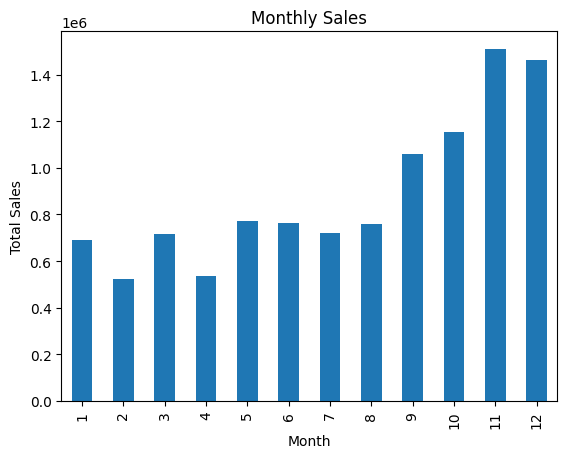

In [39]:
monthly_sales = df4.groupby("Month")["Total_Sales"].sum()
monthly_sales.plot(kind = "bar", title = "Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

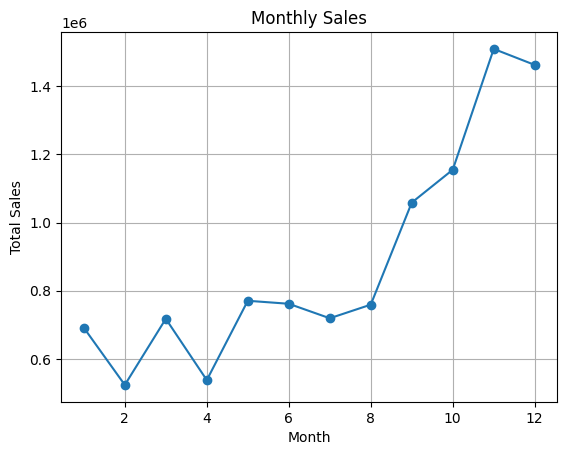

In [40]:
monthly_sales.plot(kind = "line", title = "Monthly Sales", marker = "o")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

** Insights **


Total Sales started raising up in Auguest having a peek in November. This is likely due to the holiday season at the end of the year.

##### 2. Top 5 Countries by Sales

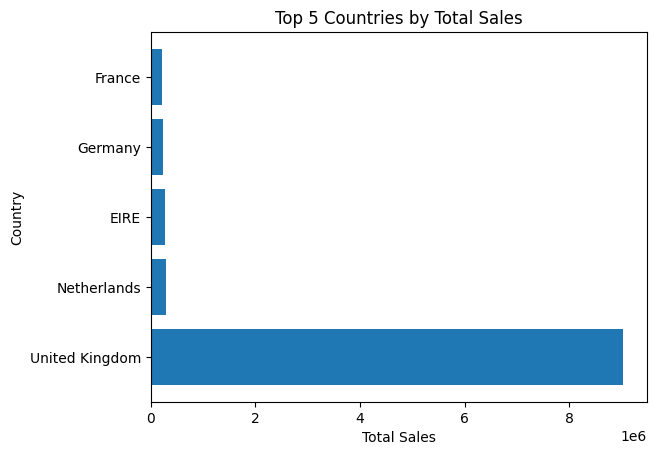

In [41]:
top_countries = df4.groupby('Country')['Total_Sales'].sum().nlargest(5)
plt.barh(top_countries.index, top_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.show()


Do it by my self.

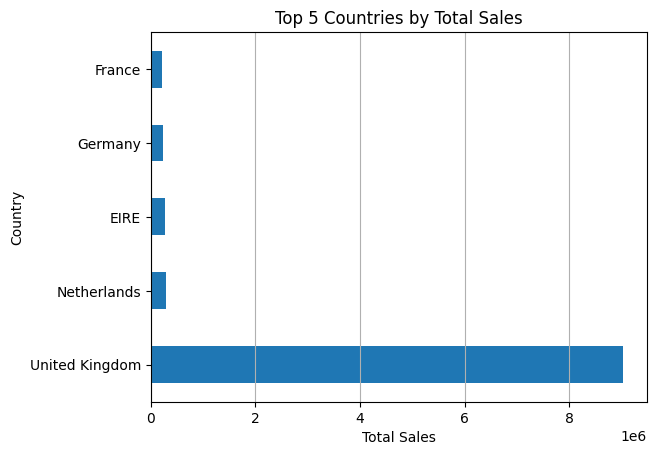

In [42]:
top_countries = df4.groupby('Country')['Total_Sales'].sum().sort_values(ascending=False).head(5)
top_countries.plot(kind = "barh", title = "Top 5 Countries by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.grid(axis = "x")
plt.show()

**Insights**

1. UK has the highest sales (around 9 million)
1. Netherlands, EIRE, Germany and France are the next 4 countries each having a sales of more than 2 million

Since these countries cover the major sales revenues, we need to pay special attention to customers in these countries and make sure our product quality and service are the best. Also to break dependancy of sales from a single country we can focus on expanding sales in other countries as well

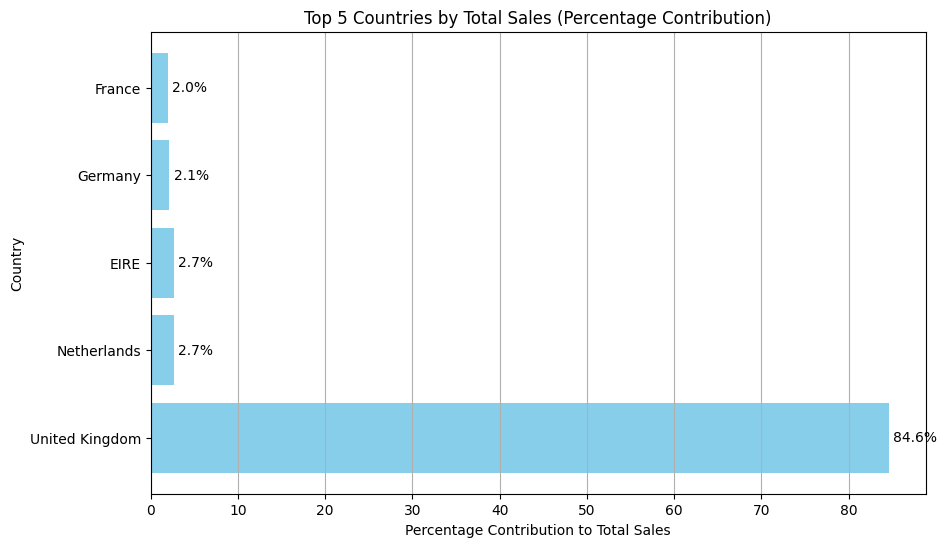

In [43]:
country_wise_sales = df4.groupby("Country")["Total_Sales"].sum()

total_sales = country_wise_sales.sum()


top_5_countries = country_wise_sales.nlargest(5)

percentages = (top_5_countries / total_sales) * 100

plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
bars = plt.barh(top_5_countries.index, percentages, color='skyblue')
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales (Percentage Contribution)')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', va='center', ha='left', color='black', fontsize=10)


plt.grid(axis='x')  # Add grid lines
plt.show()


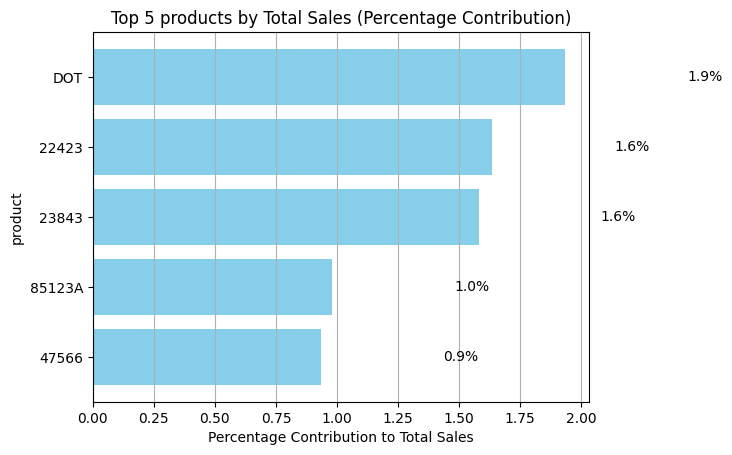

In [44]:
product_wise_sales = df4.groupby("StockCode")["Total_Sales"].sum()

total_sales = product_wise_sales.sum()


top_5_products = product_wise_sales.nlargest(5)

percentages = (top_5_products / total_sales) * 100

bars = plt.barh(top_5_products.index, percentages, color='skyblue')
plt.xlabel('Percentage Contribution to Total Sales')
plt.ylabel('product')
plt.title('Top 5 products by Total Sales (Percentage Contribution)')

# Add percentage labels to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percentage:.1f}%', va='center', ha='left', color='black', fontsize=10)

plt.gca().invert_yaxis()  # Invert the y-axis to display the highest percentage at the top
plt.grid(axis='x')  # Add grid lines
plt.show()


In [45]:
product_wise_sales.sort_values(ascending=False).head(5)

,Total_Sales
StockCode,
DOT,206248.77
22423,174484.74
23843,168469.60
85123A,104518.80
47566,99504.33


In [46]:
top_products = df4.groupby('StockCode')['Total_Sales'].sum().sort_values(ascending=False).head(5)

for stock_code in top_products.index:
    description = df4[df4['StockCode'] == stock_code]['Description'].iloc[0]
    total_sales = top_products[stock_code]
    print(f"StockCode: {stock_code}, Description: {description}, Total Sales: {total_sales}")


StockCode: DOT, Description: DOTCOM POSTAGE, Total Sales: 206248.77
StockCode: 22423, Description: REGENCY CAKESTAND 3 TIER, Total Sales: 174484.74
StockCode: 23843, Description: PAPER CRAFT , LITTLE BIRDIE, Total Sales: 168469.6
StockCode: 85123A, Description: WHITE HANGING HEART T-LIGHT HOLDER, Total Sales: 104518.8
StockCode: 47566, Description: PARTY BUNTING, Total Sales: 99504.33


**We don't have the dependency on a single product which is a good sign.**

##### 4. RFM Analysis

In [47]:
df4["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

We are adding one more day with the last date for our current date.

In [48]:
current_dt = df4["InvoiceDate"].max() + pd.Timedelta(days = 1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [49]:
rfm = df4.groupby("CustomerID").agg({
    "InvoiceDate" : lambda x : (current_dt - x.max()).days,
    "InvoiceNo" : "count",
    "Total_Sales" : "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


Verify the Recency, Frequency and Monetary in Manual

In [50]:
df4[df4.CustomerID==18283.0]["InvoiceDate"].max()

Timestamp('2011-12-06 12:02:00')

In [51]:
df4[df4.CustomerID == 18283]["InvoiceNo"].count()

756

In [52]:
df4[df4.CustomerID == 18283]["Total_Sales"].sum()

2094.88

Here we can see that CustomerID of "18283"'s last InvoiceDate is 6th dec, 2011

Current date is 10th dec, 2011

So, the recency is (10-6) = 4days ["Varified"]

Frequency = 756days ["Varified"]

Monetary = 2094.88$ ["Varified"]

In [53]:
# Segment Customers based on RFM
rfm["R_Segment"] = pd.qcut(rfm["Recency"], 4, labels = [4,3,2,1])
rfm["F_Segment"] = pd.qcut(rfm["Frequency"], 4, labels = [1,2,3,4])
rfm["M_Segment"] = pd.qcut(rfm["Monetary"], 4, labels = [1,2,3,4])
rfm["RFM_Score"] = rfm[["R_Segment", "F_Segment", "M_Segment"]].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


In [54]:
# Customers with high RFM Scores
rfm.sort_values("RFM_Score", ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
18102.0,1,431,259657.30,4,4,4,12
14367.0,8,524,9261.52,4,4,4,12
17625.0,18,315,2047.00,4,4,4,12
15484.0,1,188,3594.31,4,4,4,12
14395.0,2,350,3507.71,4,4,4,12
...,...,...,...,...,...,...,...
13133.0,274,7,109.80,1,1,1,3
15578.0,162,13,127.10,1,1,1,3
13144.0,333,3,110.95,1,1,1,3


If the RFM Scores are high than they are my Valuable Customers.

In [55]:
# Create a basket matrix for association rule mining
customer_last_purchase = df4.groupby("CustomerID")["InvoiceDate"].max()
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [56]:
# Recency Value
customer_last_purchase = (current_dt - customer_last_purchase).dt.days
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [57]:
# Define churn threshold (e.g., 90 days without purchase)
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head()

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers: 1449


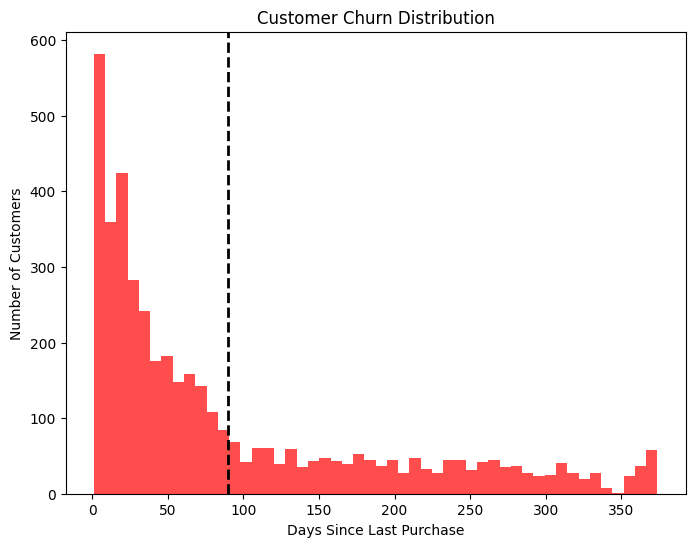

In [58]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize = (8,6))
plt.hist(customer_last_purchase, bins = 50, color = "red", alpha = 0.7)
plt.axvline(churn_threshold, color = "black", linestyle = "dashed", linewidth = 2)
plt.title("Customer Churn Distribution")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")
plt.show()

In [59]:
print(f"[{pd.__name__}] total time taken: {time.time() - stime} sec")

[pandas] total time taken: 74.62005829811096 sec
